## AI & Machine Learning for Data Quality
**Description**: AI and machine learning can automate and enhance data quality checks by learning patterns and identifying anomalies more effectively than static rules.

**Task 1**: Training a model to predict and flag unusual trend patterns in sales data that
deviate from historical norms.

In [ ]:
# write your code from here

**Task 2**: Using clustering algorithms to detect duplicate records where entries are not
exactly identical.

In [ ]:
# write your code from here

**Task 3**: Implementing classification models to validate data based on learned
characteristics from labeled datasets.


--- Task 1: Anomaly Detection in Sales Data ---


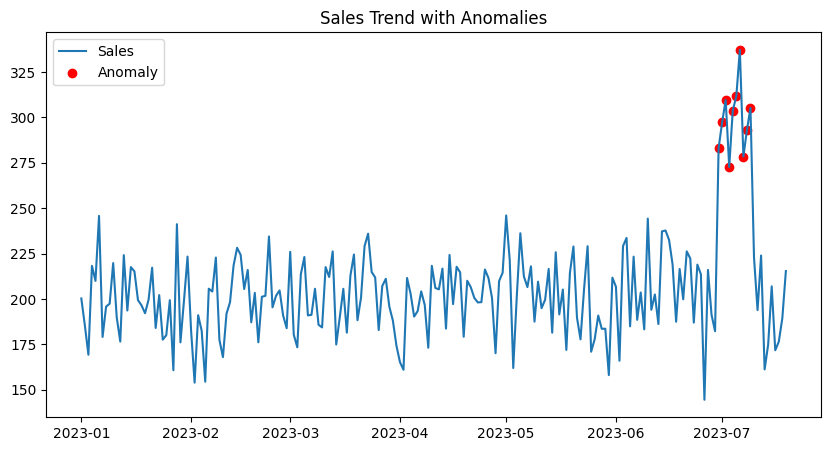


--- Task 2: Duplicate Detection with Clustering ---
         Name               Email  Cluster
0    John Doe    john@example.com        0
1     Jon Doe     jon@example.com        1
2  Jane Smith    jane@example.com        2
3     Jane S.  jane.s@example.com        3
4       Alice   alice@example.com        4
5       Alyce   alyce@example.com        4

--- Task 3: Classification for Data Quality ---

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.15      0.21        20
           1       0.81      0.93      0.87        80

    accuracy                           0.77       100
   macro avg       0.57      0.54      0.54       100
weighted avg       0.72      0.77      0.73       100

Accuracy Score: 0.77


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

# ---------------------
# Utility Functions
# ---------------------

def handle_missing_data(df):
    try:
        df = df.dropna()
        return df
    except Exception as e:
        print("Error handling missing data:", e)
        return df

def encode_categorical(df):
    try:
        df_encoded = pd.get_dummies(df, drop_first=True)
        return df_encoded
    except Exception as e:
        print("Error encoding categorical variables:", e)
        return df

# ---------------------
# Task 1: Anomaly Detection in Sales Data
# ---------------------
def anomaly_detection_in_sales():
    print("\n--- Task 1: Anomaly Detection in Sales Data ---")
    dates = pd.date_range(start='2023-01-01', periods=200)
    sales = np.random.normal(loc=200, scale=20, size=200)
    sales[180:190] = sales[180:190] + 100  # Inject anomaly
    df = pd.DataFrame({'Date': dates, 'Sales': sales})
    
    mean, std = df['Sales'].mean(), df['Sales'].std()
    df['Anomaly'] = (df['Sales'] > mean + 2 * std).astype(int)

    plt.figure(figsize=(10, 5))
    plt.plot(df['Date'], df['Sales'], label='Sales')
    plt.scatter(df[df['Anomaly'] == 1]['Date'], df[df['Anomaly'] == 1]['Sales'], color='red', label='Anomaly')
    plt.title("Sales Trend with Anomalies")
    plt.legend()
    plt.show()
    return df

# ---------------------
# Task 2: Clustering to Detect Duplicates
# ---------------------
def detect_duplicates_with_clustering():
    print("\n--- Task 2: Duplicate Detection with Clustering ---")
    data = {
        'Name': ['John Doe', 'Jon Doe', 'Jane Smith', 'Jane S.', 'Alice', 'Alyce'],
        'Email': ['john@example.com', 'jon@example.com', 'jane@example.com', 'jane.s@example.com', 'alice@example.com', 'alyce@example.com']
    }
    df = pd.DataFrame(data)
    df['Name_Encoded'] = df['Name'].apply(lambda x: sum(ord(c) for c in x))
    df['Email_Encoded'] = df['Email'].apply(lambda x: sum(ord(c) for c in x))
    
    features = df[['Name_Encoded', 'Email_Encoded']]
    model = DBSCAN(eps=50, min_samples=1)
    df['Cluster'] = model.fit_predict(features)
    
    print(df[['Name', 'Email', 'Cluster']])
    return df

# ---------------------
# Task 3: Classification Model for Data Validation
# ---------------------
def classification_for_data_quality():
    print("\n--- Task 3: Classification for Data Quality ---")
    # Generate mock data
    df = pd.DataFrame({
        'Age': np.random.randint(10, 80, 500),
        'Income': np.random.normal(50000, 10000, 500),
        'Gender': np.random.choice(['Male', 'Female'], 500),
        'Valid': np.random.choice([0, 1], 500, p=[0.2, 0.8])  # 1 = good data, 0 = bad
    })

    df = handle_missing_data(df)
    df_encoded = encode_categorical(df)

    X = df_encoded.drop('Valid', axis=1)
    y = df_encoded['Valid']

    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        clf = RandomForestClassifier(random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("Accuracy Score:", accuracy_score(y_test, y_pred))
        return clf
    except Exception as e:
        print("Error during training:", e)

# ---------------------
# Run All Tasks
# ---------------------
if __name__ == "__main__":
    sales_df = anomaly_detection_in_sales()
    duplicates_df = detect_duplicates_with_clustering()
    model = classification_for_data_quality()

